# 8장 범주형 데이터 분석
* 범주형 데이터를 분석하기 위해 카이제곱 검정(Chi Squared Test)에 대해 알아본다.
* 카이제곱 검정: 카이제곱 분포에 기초한 통계분석 방법으로 관측된 빈도가 기대되는 빈도와 통계적으로 유의미하게 다른지 검정하는 방법으로 비율감정이라도 불린다.
<br/>
<br/>

| 카이제곱 검정   종류 |                           목적                          |
|:--------------------:|:-------------------------------------------------------:|
| 적합도 검정          | 관찰된 비율 값과 기댓값이 같은지 확인  |
| 독립성 검정          | 두 범주형 변수 사이의 연관성 확인                       |
| 동질성 검정          | 두 모집단으로부터 생성된 표본 집단의 분포가 같은지 확인 |
<표: 카이제곱 검정 종류>

<br/>
<br/>


#### 8.1 적합도 검정

(1) 개념

* 적합도 검정은 귀무가설에서 제시한 각 범주의 비율이 실제 자료에 적합한지를 알아본는 검정 방법이다.
* 데이터가 여러 개의 범주에 대한 관측도수 형태로 주어지는 문제를 다룰 때 사용.
* 범주형 변수 $X$에 대해서, 각 빈도와 비율이 주어졌을 때 빈도교차표는 다음과 같다.

| $X$   | $\mathbb{P}$ ( $X$ = $x$ )  | 관측도수($O$) | 기대도수($E$) |
|:------:|:---------------------:|:------:|:--------:|
| $x_{1}$   | $p_{1}$                  | $n_{1}$   |  $np_{1}$  |
| $x_{2}$   | $p_{2}$                  | $n_{2}$   |$np_{2}$|
| $\vdots$   |    $\vdots$          |$\vdots$|$\vdots$|
| $x_{k}$   | $p_{k}$                  | $n_{k}$   |$np_{k}$|
| 합계 | 1                   | $n$    |    $n$    |


* 범주별로 관측도수와 기대도수가 있으므로, 카이제곱 통계량을 계산할 수 있다.
\begin{align*}
    \chi_{obs}^{2} = \sum_{i=1}^{k}\frac{(O_{i} - E_{i})^{2}}{E_{i}}\\
    where \quad E_{i} = np_{i},\quad O_{i} = n_{i}
\end{align*}
만약, $\chi_{obs}^{2} > \chi_{(k-1,\alpha)}^{2}$면 귀무가설 기각한다.(이때 $k-1$는 자유도, $\alpha$는 유의수준) 

*  관측도수와 기대도수의 차이가 크지 않다면 귀무가설에서율제시한 비율과 실제 비율이 서로 크게 다르지 않다는 것이다. 
*  관측도수와 기대도수의 차이가 크다면 귀무가설에서 제시한 비율과 실제 비율의 차가 달라 귀무가설에서 제시한 비율은 적합하지 않다.

(2) 예시
* A쇼핑은 클레임 고객들의 구매 패턴이 어떻게 다른지 파악하고자 클레임 고객들의 구매유형 별 적합도 검정을 시행하고자 한다.

* 기존 클레임 고객 구매별 정리

| 구매유형 | 구분 | 비율 |
|----------|------|------|
| 1회성    | 1    | 10%  |
| 실용적   | 2    | 30%  |
| 명품     | 3    | 20%  |
| 집중     | 4    | 40%  |

클레임 접수  無 =0, 有 = 1
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{클레임 접수 고객의 구매유형별 비율은 기존과 같다.}\\
    H_{1}(\text{연구가설}) &= \text{클레임 접수 고객의 구매유형별 비율은 기존과 같지 않다.} 
\end{align}
<br/>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_dir = '/content/drive/MyDrive/pythondata/데이터'
df = pd.read_csv(file_dir + '/Ashopping.csv', encoding = 'CP949')

In [ ]:
df.info() # 클레임접수여부 열과 구매유형 열을 이용할 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
print(df.groupby('클레임접수여부')['구매유형'].apply(lambda x: x.value_counts()))
# pandas의 crosstab을 이용하여 빈도교차표를 만든다. margins가 True면 합계를 보여준다.
crs_tb = pd.crosstab(df.클레임접수여부, df.구매유형, margins = True)
crs_tb

클레임접수여부   
0        4    263
         2    197
         3     57
         1     24
1        4    233
         2    120
         3     87
         1     19
Name: 구매유형, dtype: int64


구매유형,1,2,3,4,All
클레임접수여부,,,,,
0,24,197,57,263,541
1,19,120,87,233,459
All,43,317,144,496,1000


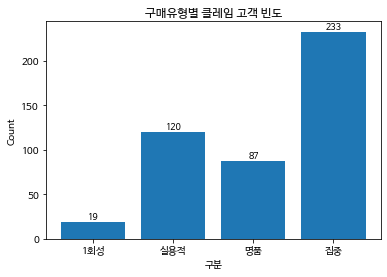

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.hist(df[df['클레임접수여부']== 1]['구매유형'])
x = df[df['클레임접수여부']== 1]['구매유형'].value_counts().index
y = df[df['클레임접수여부']== 1]['구매유형'].value_counts()

plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y.iloc[i], y.iloc[i],                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')    
plt.title('구매유형별 클레임 고객 빈도')
plt.xticks([1, 2 , 3, 4], labels=['1회성','실용적','명품','집중'])
plt.xlabel('구분')
plt.ylabel('Count')
plt.show()

In [ ]:
# 클레임 접수 경험 고객 별 빈도
obs = crs_tb.values[1,:4]
prb = np.array([0.1,0.3,0.2,0.4])
# 기댓값을 계산하기 위해 total num select
n = crs_tb.values[1,4]
E = n*prb

In [ ]:
chi_stat, chi_p = stats.chisquare(obs, E)
print('Chi-Square score : {:.4f}'.format(chi_stat))
print('Chi-Square p_value : {:.4f}'.format(chi_p))

Chi-Square score : 31.5828
Chi-Square p_value : 0.0000


카이제곱 검증의 p_value가 0.01 이하(유의수준 99%)이므로 귀무가설을 기각한다. 즉, 클레임 접수 고객의 구매유형별 비율은 기존과 다르다. 그렇다면 실제 비율은 어떻게 나올까?

In [ ]:
total_num = obs.sum()
R_prb = [round(i/total_num,2) for i in obs]
R_prb

[0.04, 0.26, 0.19, 0.51]

클레임 접수 고객 집중 구매형의 유형이 약 50% 이상으로 기댓값(40%)보다 높게 측정된다. 따라서 집중 구매형 고객들에 집중하여 클레임 수를 줄여야한다.

#### 8.2 독립성 검정
(1) 개념

* 독립성 검정: 두 개의 범주형 변수간에 연관성의 유,무를 카이제곱 검정을 통해 판단한다.

|                     | $B_{1}$  | $B_{2}$  | 행 빈도합 |
|---------------------------------|-----|-----|-----------|
| $A_{1}$                              | $O_{11}$ | $O_{12}$ | $O_{1+}$       |
| $A_{2}$                              | $O_{21}$ | $O_{22}$ | $O_{2+}$       |
| 열 빈도합                       | $O_{+1}$ | $O_{+2}$ | $O_{++}$       |

* 2개의 변수 A, B를 통해 빈도교차표를 제작한다. 이때 $O_{ij}$는 $A_{i}$ 변수와 $B_{j}$ 변수에 해당하는 관측치이고, 각 행/열의 빈도합은
\begin{align}
&O_{i+} = \sum_{j=1}^{l} O_{ij},\\
&O_{+j} = \sum_{i=1}^{k} O_{ij},\\
&O_{++} = \sum_{i=1}^{k}\sum_{j=1}^{l} O_{ij}
\end{align}이다. 독립성 검정에서 기대도수는 행 빈도합과 열 빈도합의 곱을 전체 빈도수로 나눈 값이다. 즉 
\begin{align}
    E_{ij} = \frac{O_{i+}\cdot O_{+j}}{O_{++}}
\end{align}
* 빈도교차표를 이용하여 기대도수 빈도교차표를 만들 수 있다.

|                     | $B_{1}$  | $B_{2}$  | 행 빈도합 |
|---------------------------------|-----|-----|-----------|
| $A_{1}$                              | $E_{11}$ | $E_{12}$ | $O_{1+}$       |
| $A_{2}$                              | $E_{21}$ | $E_{22}$ | $O_{2+}$       |
| 열 빈도합                       | $O_{+1}$ | $O_{+2}$ | $O_{++}$       |

* 범주별로 관측도수와 기대도수가 있으므로, 카이제곱 통계량을 계산할 수 있다.
\begin{align*}
    \chi_{obs}^{2} = \sum_{j=1}^{l}\sum_{i=1}^{k}\frac{(O_{ij} - E_{ij})^{2}}{E_{ij}}
\end{align*}
만약, $\chi_{obs}^{2} > \chi_{(k-1)(l-1);\alpha}^{2}$면 귀무가설 기각한다.(이때 $(k-1)(l-1)$는 자유도, $\alpha$는 유의수준)

(2) 예시
* A쇼핑은 클레임을 제기하는 고객들이 성별과 무관하지 않을 것이라고 본다. 그것을 증명하기 위해 클레임 접수 여부와 성별간의 독립성 검정을 실행한다.

성별 남 = 0, 여 = 1

클레임 접수  無 =0, 有 = 1
<br/>
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{클레임 접수 여부는 성별과 상관 없다.}\\
    H_{1}(\text{연구가설}) &= \text{클레임 접수 여부는 성별과 상관 있다.} 
\end{align}
<br/>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [78]:
X = pd.crosstab(df.클레임접수여부, df.성별, margins = False)
X.columns = ['남','녀']
X.index = ['클레임 X', '클레임 O']
col_sum = X.sum(axis = 'columns')
row_sum = X.sum(axis = 'rows')
tot = df.shape[0]
print(col_sum)
print(row_sum)
print(tot)
print('Cross table : \n{:}'.format(X))

클레임 X    541
클레임 O    459
dtype: int64
남    149
녀    851
dtype: int64
1000
Cross table : 
         남    녀
클레임 X  139  402
클레임 O   10  449


성별로 표본의 수에 대한 비율은 다음과 같다. 
\begin{align}
    (\frac{149}{1000}, \frac{851}{1000})
\end{align}
그러므로 $H_{0}$이 사실일 경우 각 성별간의 기대도수는 다음과 같다.
\begin{align}
    &E_{11} = 541\cdot \frac{149}{1000} = 80.61,\quad E_{12} = 541 \cdot \frac{851}{1000} = 460.39,\\
    &E_{21} = 459\cdot \frac{149}{1000} = 68.391, \quad E_{12} = 459 \cdot \frac{851}{1000} = 390.61
\end{align}

In [79]:
# 독립성 검정을 위해 chi2_contingency를 불러온다.
chi2_stat, chi2_p, free, expected_freq = stats.chi2_contingency(X)
print('---------------------------------result---------------------------------')
print('Independence test Chi-Square score : {:.4f}'.format(chi2_stat))
print('Independence test Chi-Square p_value : {:.4f}'.format(chi2_p))
print('Degree of freedom : {:}'.format(free))
print('Expected frequency : \n{:}'.format(expected_freq))

---------------------------------result---------------------------------
Independence test Chi-Square score : 106.4379
Independence test Chi-Square p_value : 0.0000
Degree of freedom : 1
Expected frequency : 
[[ 80.609 460.391]
 [ 68.391 390.609]]


카이제곱 검증의 p_value가 0.01 이하(유의수준 99%)이므로 귀무가설을 기각한다. 즉, 클레임 접수 여부는 성별과 상관이 있다. 따라서 성별에 따라 다른 방식의 고객서비스를 제공하여 클레임 접수를 줄여야한다.

#### 동질성 검정 (Test of Homogeneity)

(1) 개념

* 동질성 검정: 서로 다른 모집단에서 추출된 표본들의 범주별 비율이 서로 동질적인지 검정하는 통계 기법이다. 분석 방법은 독립성 검정과 동일하게 카이제곱 검정을 이용하나, 하나의 표본이 아닌 서로 다른 표본에서 공통된 범주형 변수의 비율이 같은지 확인한다.

(2) 예시

* A쇼핑은 구매유형 4가지 비율이 청년층 그룹과 중장년층 그룹에 따라 동질적인지 검토하여 연령별 마케팅에 사용하고자 한다.
* 서로 다른 모집단 = (청년층 그룹) (중장년층 그룹)
* 이때 아래 표의 구분이 1$\sim$5인 경우 청년층, 6$\sim$9를 중장년층으로 정의한다.

| 고객 나이대 | 구분 |
|-------------|------|
| 19세 이하   | 1    |
| 20~24세     | 2    |
| 25~29세     | 3    |
| 30~34세     | 4    |
| 35~39세     | 5    |
| 40~44세     | 6    |
| 45~49세     | 7    |
| 50~54세     | 8    |
| 55세 이상   | 9    |

\begin{align}
    H_{0}(\text{귀무가설}) &= \text{청년층과 중장년층의 구매 유형 비율은 동일하다.}\\
    H_{1}(\text{연구가설}) &= \text{청년층과 중장년층의 구매 유형 비율은 동일하지 않다.} 
\end{align}
<br/>


In [112]:
df['고객연령대'] = ""
for i in range(1,1+df.고객_나이대.nunique()):    
    if i <= 5:
        df.고객연령대[df.고객_나이대 == i] = "1"
    else:
        df.고객연령대[df.고객_나이대 == i] = "2"

<ipython-input-112-b28df92ead26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.고객연령대[df.고객_나이대 == i] = "1"
<ipython-input-112-b28df92ead26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.고객연령대[df.고객_나이대 == i] = "2"


In [137]:
df1 = df.loc[df.고객연령대 == '1']
df2 = df.loc[df.고객연령대 == '2']

#랜덤 표본 추출
df1_sam = df1.sample(200, random_state = 29)
df2_sam = df2.sample(200, random_state = 29)

df3 = pd.concat([df1_sam, df2_sam], axis = 0)
X = pd.crosstab(df3.고객연령대, df3.구매유형, margins = False)
X

구매유형,1,2,3,4
고객연령대,,,,
1,10,67,18,105
2,8,65,38,89


In [138]:
# 동질성 검정을 위해 chi2_contingency를 불러온다.
chi2_stat, chi2_p, free, expected_freq = stats.chi2_contingency(X)
print('---------------------------------result---------------------------------')
print('Homogeneity test Chi-Square score : {:.4f}'.format(chi2_stat))
print('Homogeneity test Chi-Square p_value : {:.4f}'.format(chi2_p))
print('Degree of freedom : {:}'.format(free))
print('Expected frequency : \n{:}'.format(expected_freq))

---------------------------------result---------------------------------
Homogeneity test Chi-Square score : 8.7150
Homogeneity test Chi-Square p_value : 0.0333
Degree of freedom : 3
Expected frequency : 
[[ 9. 66. 28. 97.]
 [ 9. 66. 28. 97.]]


유의수준 5%로 검정한다고 가정하면 p_value 값이 약 0.03이므로 귀무가설이 기각된다. 즉, 청년층과 중장년층의 구매 유형 비율은 상의하다는 것을 알 수 있다. 실제 비율을 계산하면,

In [139]:
X.columns = ['1회성','실용적','명품','집중']
X.index = ['청년층','중장년층']

In [140]:
X['tot'] = X.copy().sum(axis='columns')
X = X/X['tot'][1]
X = X.drop(labels = 'tot', axis = 1)
X

,1회성,실용적,명품,집중
청년층,0.05,0.335,0.09,0.525
중장년층,0.04,0.325,0.19,0.445


위에 계산된 비율과 같이 청년층은 실용적, 집중 구매형의 비율이 높았고, 중장년층은 청년층과 큰 차이는 없지만 명품 구매형에서 차이가 부각되는 것을 볼 수 있다.